# Section-1.0 Importing data

## 1.1 Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt 
import mlflow
import mlflow.tensorflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(style="white", palette="muted", color_codes=True)


# Mlflow Tracking

In [83]:
import getpass
os.environ["MLFLOW_TRACKING_USERNAME"] = input("ENTER YOUR DAGSHUB USERNAME:")
os.environ["MLFLOW_TRACKING_PASSWORD"] = getpass.getpass("ENTER YOUR SECRET PASSWORD:")
 
remote_server_uri = "http://127.0.0.1:5000" # set to your server URI
dagshub = "https://dagshub.com/Omdena/Dryad.mlflow"
mlflow.set_tracking_uri(dagshub)  # or set the MLFLOW_TRACKING_URI in the env

In [84]:
mlflow.tracking.get_tracking_uri()

'https://dagshub.com/Omdena/Dryad.mlflow'

In [86]:
exp_name = "Arsalan_Omdena"
mlflow.set_experiment(exp_name)

INFO: 'Arsalan_Omdena' does not exist. Creating a new experiment


## 1.2 Loading data

In [87]:
data_path = "E:/DataScience_Ai/hobby_projects/Omdena-challenge/Dryad/DNN_Syed_Arsalan_Amin/released_datasets/v1/A/data/train_set.csv"

In [88]:
df = pd.read_csv(data_path)

In [89]:
old_new_columns_dict = dict(zip(df.columns.to_list(), [i.replace('-','_') for i in df.columns]))
df = df.rename(columns=old_new_columns_dict)

In [90]:
df.head(2)

,sensor_node_id,scan_time,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,...,start_time,end_time,burn_material,burn_material_amount(g),hotplate_start,hotplate_temp,distance_sensor_hotplate,venue,venue_type,encoded_specimen
0,146,2021-09-01 09:01:36.817528009,18.8,19.0,19.6,19.6,19.7,20.0,20.1,20.1,...,2021-09-01 08:30:22.000000000,2021-09-01 18:50:46.000000000,SP2,600.0,2021-09-01 10:03:57.000000000,500,30m,hall,Hall,0
1,146,2021-09-01 09:02:13.375891000,19.2,19.3,19.8,19.8,19.9,20.2,20.2,20.2,...,2021-09-01 08:30:22.000000000,2021-09-01 18:50:46.000000000,SP2,600.0,2021-09-01 10:03:57.000000000,500,30m,hall,Hall,0


# Exploring data

## Categorical columns

In [91]:
df.columns

Index(['sensor_node_id', 'scan_time', 'temp_0', 'temp_1', 'temp_2', 'temp_3',
       'temp_4', 'temp_5', 'temp_6', 'temp_7', 'temp_8', 'temp_9', 'humid_0',
       'humid_1', 'humid_2', 'humid_3', 'humid_4', 'humid_5', 'humid_6',
       'humid_7', 'humid_8', 'humid_9', 'gas_scan_0', 'gas_scan_1',
       'gas_scan_2', 'gas_scan_3', 'gas_scan_4', 'gas_scan_5', 'gas_scan_6',
       'gas_scan_7', 'gas_scan_8', 'gas_scan_9', 'gas_scan_cnt', 'trigger',
       'experiment_id', 'start_time', 'end_time', 'burn_material',
       'burn_material_amount(g)', 'hotplate_start', 'hotplate_temp',
       'distance_sensor_hotplate', 'venue', 'venue_type', 'encoded_specimen'],
      dtype='object')

In [92]:
# drop_cols = ['scan_time', 'start_time', 'end_time', 'venue_type','hotplate_start', 'hotplate_temp', 'distance_sensor_hotplate', 'burn_material', 'venue', 'trigger']
drop_cols = ['sensor_node_id', 'scan_time', 'trigger', 'burn_material', 'burn_material_amount(g)', 'end_time', 'hotplate_start', 'hotplate_temp', 'distance_sensor_hotplate', 'start_time', 'venue', 'venue_type']
df = df.drop(drop_cols, axis = 1) # axis =1 means drop the columns

In [93]:
print(df.shape)
df.head(2)

(2008, 33)


,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,...,gas_scan_3,gas_scan_4,gas_scan_5,gas_scan_6,gas_scan_7,gas_scan_8,gas_scan_9,gas_scan_cnt,experiment_id,encoded_specimen
0,18.8,19.0,19.6,19.6,19.7,20.0,20.1,20.1,20.3,20.4,...,168200.0,855800.0,692100.0,613100.0,150400.0,300900.0,364900.0,1.0,6,0
1,19.2,19.3,19.8,19.8,19.9,20.2,20.2,20.2,20.4,20.5,...,254800.0,1375800.0,1115100.0,971500.0,216100.0,358000.0,416900.0,2.0,6,0


# 2.0 Exploring and Data Preprocessing

<AxesSubplot:>

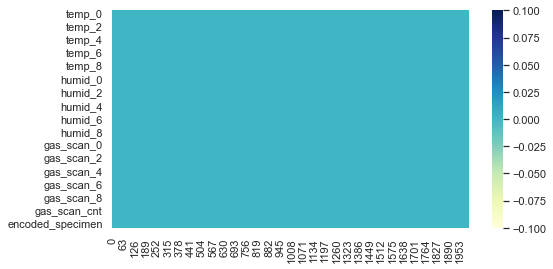

In [123]:
plt.figure(figsize=(8,4)) # seems like our data don't have missing values !
sns.heatmap(df.isna().transpose(), cmap="YlGnBu")

<AxesSubplot:>

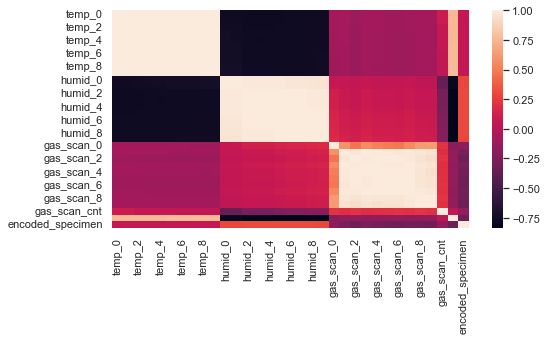

In [95]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr())

<AxesSubplot:>

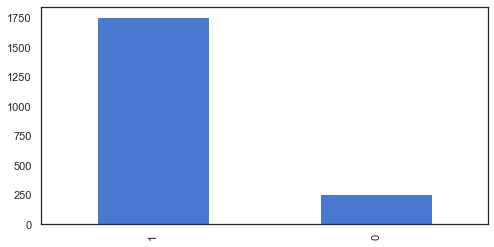

In [96]:
df['encoded_specimen'].value_counts().plot(figsize=(8, 4), kind='bar')

In [97]:
X = df.drop(["encoded_specimen"], axis=1)

# encode specimen_class values as integers
Y = df.encoded_specimen

In [98]:
print(X.shape)
print(Y.shape)

(2008, 32)
(2008,)


In [99]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [101]:
y_train.value_counts()

1    1231
0     174
Name: encoded_specimen, dtype: int64

In [117]:
# def train(epochs = 1, batch_size = 1):
n_features = x_train.shape[1]

epochs = 1000
batch_size = 64

with mlflow.start_run() as run:
    mlflow.tensorflow.autolog(every_n_iter=1)

    n1 = 128
    n2 = 32
    n_l =1

    model = Sequential()
    model.add(Dense(n1, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(n2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(n2, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(n_l, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

    pred = model.predict(x_test)
    val_loss, val_accuracy = model.evaluate(x_test, y_test)

    mlflow.log_param('batch_size', batch_size)
    mlflow.log_param('epochs', epochs)
    mlflow.log_params({'neuron_layer1': n1, 'neurons_layer2':n2})
    mlflow.log_metrics({"accuracy": history.history['accuracy'][-1], "loss": history.history['accuracy'][-1]})

    mlflow.log_metrics({'val_loss': val_loss, 'val_accuracy': val_accuracy})

    mlflow.log_artifact(data_path)
    print(f"Save to: {mlflow.get_artifact_uri()}")

    print(f"val_acc:{val_accuracy}\n",f"val_loss:{val_loss}")
    
    # saving model
    # tmpdir = "E:/DataScience_Ai/hobby_projects/Omdena-challenge/Dryad/DNN_Syed_Arsalan_Amin/tf"
    # saved_models = os.path.join(tmpdir, "/1")
    # tf.saved_model.save(model, saved_models)

    # mlflow.tensorflow.log_model(model, saved_models)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 9,441
Trainable params: 9,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 5s 156ms/step - loss: 0.3644 - accuracy: 0.8762 - val_loss: 0.3092 - val_accuracy: 0.8673
Epoch 2/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.2524 - accuracy: 0.8890 - val

2021/10/04 22:54:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Syed Arsalan Amin\anaconda3\envs\tf25\lib\site-packages\mlflow\tensorflow.py:853: UserWarning: Logging to MLflow failed: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_clear_session_function'"


19/19 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9917
Save to: ./artifacts/340/36c104e845e54644b392265b1f6569c1/artifacts
val_acc:0.9917080998420715
 val_loss:0.038086965680122375


In [ ]:

accuracy: 0.9917
val_acc:0.9917

loss: 0.0381
val_loss:0.0380

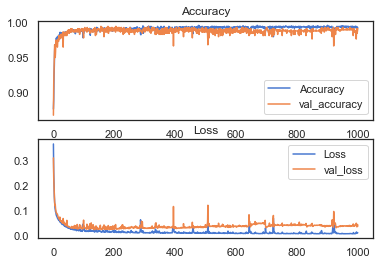

In [118]:
plt.subplot(2,1,1)

plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.title("Loss")
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()


In [119]:
pred = model.predict(x_test).round()
cm = confusion_matrix(y_test, pred)

<AxesSubplot:>

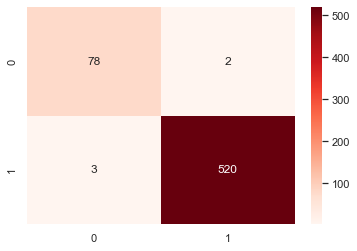

In [120]:
# plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')

In [121]:
target_names = ['in_smoke', 'clean_air']
print(classification_report(y_test, pred.round(), target_names=target_names))

              precision    recall  f1-score   support

    in_smoke       0.96      0.97      0.97        80
   clean_air       1.00      0.99      1.00       523

    accuracy                           0.99       603
   macro avg       0.98      0.98      0.98       603
weighted avg       0.99      0.99      0.99       603

